In [54]:
import pandas as pd
import seaborn as sns

In [55]:
df = pd.read_excel('./Data/2410_iPAGE_SoilData_cleaned.xlsx')
df.head()

,Area,soil group,Land class,knit (surface),pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
0,Mithpukur,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86
1,Mithpukur,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75
2,Mithpukur,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95
3,Mithpukur,belab,high ground,Clay loam,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.00
4,Mithpukur,belab,high ground,Clay loam,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04


In [56]:
df.columns

Index(['Area', 'soil group', 'Land class', 'knit (surface)', 'pH', 'SOC (%)',
       'Nitrogen N (%)', 'Potassium K (meq/100)', 'Phosphorus P (ug/g)',
       'Sulfur S (ug/g)', 'Boron B (ug/g)', 'Zinc Zn (ug/g)'],
      dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   618 non-null    object 
 1   soil group             618 non-null    object 
 2   Land class             618 non-null    object 
 3   knit (surface)         461 non-null    object 
 4   pH                     618 non-null    float64
 5   SOC (%)                618 non-null    float64
 6   Nitrogen N (%)         618 non-null    float64
 7   Potassium K (meq/100)  618 non-null    float64
 8   Phosphorus P (ug/g)    617 non-null    float64
 9   Sulfur S (ug/g)        618 non-null    float64
 10  Boron B (ug/g)         618 non-null    float64
 11  Zinc Zn (ug/g)         618 non-null    float64
dtypes: float64(8), object(4)
memory usage: 58.1+ KB


In [59]:
df.shape

(618, 12)

#### Exploratory Data Analysis
There are 618 rows and 12 columns in this dataset. The columns represent the physical properties and chemical composition of soil. 
1. Area 
2. Soil group
3. Land class
4. Knit (surface)
5. pH
6. SOC (%)
7. Nitrogen N (%)
8. Potassium K (meq/100)
9. Phosphorus P (ug/g)
10. Sulfur S (ug/g)
11. Boron B (ug/g)
12. Zinc Zn (ug/g)


In [73]:
# Analysing the categorical variables
for col in df.columns:
    if df[col].dtype in [object]:
        print('Attribute :',col)
        print(df[col].describe())
        print(df[col].unique())
        print('-----------------------------------')

Attribute : Area
count           618
unique            5
top       Mithpukur
freq            213
Name: Area, dtype: object
['Mithpukur' 'Pirgacha ' 'Gangachara' 'Kaunia upazila' 'Taraganj Thana']
-----------------------------------
Attribute : soil group
count            618
unique            27
top       Gangachara
freq             238
Name: soil group, dtype: object
['belab' 'Noadda' 'Sahapur' 'the moon' 'the pen ' 'Khilgaon' 'Pirgacha'
 'Palashbari' 'Berries' 'Gangachara' 'Kaunia' 'Imadpur '
 'Alluvial soil of Teesta' 'Teesta sandy soil' 'Kachna ' 'The militants'
 'Berries ' 'Imadpur' 'The militants ' 'Kachna' 'Chilmari' 'Saghata '
 'recession' 'Menanagar' 'Bhimpur' 'Indrail' 'chilmari']
-----------------------------------
Attribute : Land class
count                  618
unique                   5
top       Medium high land
freq                   319
Name: Land class, dtype: object
['high ground' 'Medium high land' 'Medium low land'
 'Deep medium high land' 'Shallow to medium high 

In [76]:
# Analysing the numerical columns
for col in df.columns:
    if df[col].dtype in [float]:
        print('Attribute :',col)
        print(df[col].describe())
        print(df[col].info())
        print('-----------------------------------------')

Attribute : pH
count    618.000000
mean       5.236942
std        0.469949
min        4.100000
25%        4.900000
50%        5.200000
75%        5.400000
max        7.800000
Name: pH, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 618 entries, 0 to 617
Series name: pH
Non-Null Count  Dtype  
--------------  -----  
618 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB
None
-----------------------------------------
Attribute : SOC (%)
count    618.000000
mean       1.792214
std        1.034159
min        0.100000
25%        1.352500
50%        1.700000
75%        2.160000
max       20.400000
Name: SOC (%), dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 618 entries, 0 to 617
Series name: SOC (%)
Non-Null Count  Dtype  
--------------  -----  
618 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB
None
-----------------------------------------
Attribute : Nitrogen N (%)
count    618.000000
mean       0.111832
std        0.507259
min     

<Axes: >

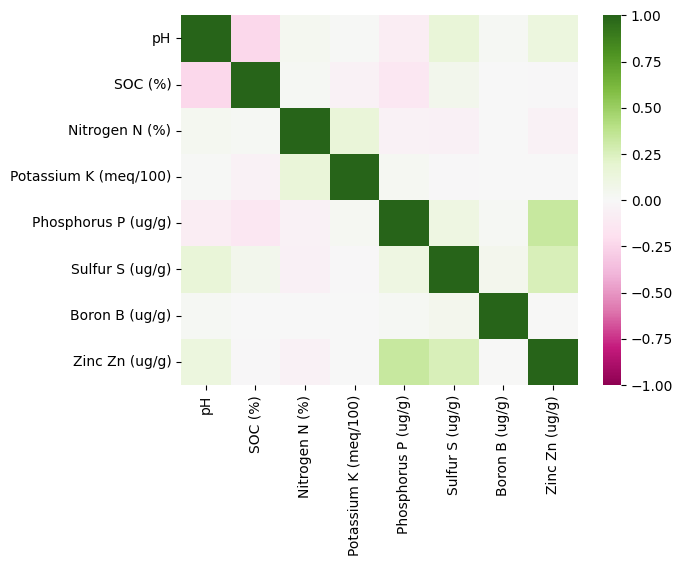

In [89]:
# checking the linear correlation between the variables
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr,cmap="PiYG",vmin=-1, vmax=1, center=0)

### Goal 
The Goal here is to build a predictive model for the micronutrients SOC,Boron and Zinc.
There are 10 attributes of soil, which includes its physical properties and chemical composition. 

